# Problem statement 3:
Perform the following operations using Python
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use the following techniques to deal with them. \
a) Delete rows or column \
b) Replace missing values with mean \
c) Replace missing values with mode \
d) Replace missing values with median 
2. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("AcademicPerformance.csv")

In [3]:
df

,Roll No.,Name,Gender,Address,Suburb,Fee Status,Height,Weight,Family Income,Math Score,Science Score,English Score
0,1,James,M,85 Turner St,Abbotsford,Paid,65.78331,112.9925,226802.0,72.0,72.0,74.0
1,2,John,M,25 Bloomburg St,Abbotsford,Paid,71.51521,136.4873,89814.0,69.0,90.0,88.0
2,3,Robert,M,5 Charles St,Abbotsford,NaN,69.39874,153.0269,336951.0,90.0,95.0,93.0
3,4,Michael,M,40 Federation La,Abbotsford,Paid,68.21660,142.3354,160323.0,47.0,57.0,44.0
4,5,William,M,55a Park St,Abbotsford,Paid,67.78781,144.2971,103497.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Peggy,F,40 New St,Armadale,Paid,69.89473,115.6752,110342.0,85.0,76.0,71.0
246,247,Caleb,M,35 Northcote Rd,Armadale,Paid,69.83048,134.7905,143385.0,89.0,76.0,74.0
247,248,Eleanor,F,7/53 Wattletree Rd,Armadale,Paid,65.39790,120.5746,107189.0,NaN,70.0,68.0
248,249,Isaac,M,791 High St,Armadale,Paid,68.32214,120.0835,212944.0,65.0,64.0,62.0


In [4]:
df.head()

,Roll No.,Name,Gender,Address,Suburb,Fee Status,Height,Weight,Family Income,Math Score,Science Score,English Score
0,1,James,M,85 Turner St,Abbotsford,Paid,65.78331,112.9925,226802.0,72.0,72.0,74.0
1,2,John,M,25 Bloomburg St,Abbotsford,Paid,71.51521,136.4873,89814.0,69.0,90.0,88.0
2,3,Robert,M,5 Charles St,Abbotsford,NaN,69.39874,153.0269,336951.0,90.0,95.0,93.0
3,4,Michael,M,40 Federation La,Abbotsford,Paid,68.21660,142.3354,160323.0,47.0,57.0,44.0
4,5,William,M,55a Park St,Abbotsford,Paid,67.78781,144.2971,103497.0,76.0,78.0,75.0


In [5]:
df.tail()

,Roll No.,Name,Gender,Address,Suburb,Fee Status,Height,Weight,Family Income,Math Score,Science Score,English Score
245,246,Peggy,F,40 New St,Armadale,Paid,69.89473,115.6752,110342.0,85.0,76.0,71.0
246,247,Caleb,M,35 Northcote Rd,Armadale,Paid,69.83048,134.7905,143385.0,89.0,76.0,74.0
247,248,Eleanor,F,7/53 Wattletree Rd,Armadale,Paid,65.39790,120.5746,107189.0,NaN,70.0,68.0
248,249,Isaac,M,791 High St,Armadale,Paid,68.32214,120.0835,212944.0,65.0,64.0,62.0
249,250,Todd,M,25 Llaneast St,Armadale,Paid,65.83982,106.2265,138634.0,68.0,60.0,53.0


In [6]:
len(df)

250

In [7]:
df.shape

(250, 12)

In [8]:
df.describe()

,Roll No.,Height,Weight,Family Income,Math Score,Science Score,English Score
count,250.000000,245.000000,245.000000,247.000000,234.000000,236.000000,241.000000
mean,125.500000,67.997459,127.251664,188774.846154,66.264957,67.169492,67.427386
std,72.312977,1.921536,11.946864,100654.655172,33.759791,17.644144,20.381055
min,1.000000,63.425770,97.901910,21175.000000,1.000000,2.000000,10.000000
25%,63.250000,66.593470,119.308700,110509.500000,55.000000,56.000000,56.000000
50%,125.500000,68.021200,127.869300,177493.000000,65.500000,69.000000,68.000000
75%,187.750000,69.370030,136.063200,238942.000000,76.750000,80.000000,78.000000
max,250.000000,73.901070,158.956200,513100.000000,504.000000,100.000000,230.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Roll No.       250 non-null    int64  
 1   Name           250 non-null    object 
 2   Gender         250 non-null    object 
 3   Address        250 non-null    object 
 4   Suburb         240 non-null    object 
 5   Fee Status     222 non-null    object 
 6   Height         245 non-null    float64
 7   Weight         245 non-null    float64
 8   Family Income  247 non-null    float64
 9   Math Score     234 non-null    float64
 10  Science Score  236 non-null    float64
 11  English Score  241 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 23.6+ KB


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use the following techniques to deal with them. \
a) Delete rows or column \
b) Replace missing values with mean \
c) Replace missing values with mode \
d) Replace missing values with median 

In [10]:
df.isna()

,Roll No.,Name,Gender,Address,Suburb,Fee Status,Height,Weight,Family Income,Math Score,Science Score,English Score
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,True,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb           10
Fee Status       28
Height            5
Weight            5
Family Income     3
Math Score       16
Science Score    14
English Score     9
dtype: int64

In [12]:
# Deleting Columns with 3 or more than 3 missing values
df.dropna(axis=0, thresh=10, inplace=True)

In [13]:
df

,Roll No.,Name,Gender,Address,Suburb,Fee Status,Height,Weight,Family Income,Math Score,Science Score,English Score
0,1,James,M,85 Turner St,Abbotsford,Paid,65.78331,112.9925,226802.0,72.0,72.0,74.0
1,2,John,M,25 Bloomburg St,Abbotsford,Paid,71.51521,136.4873,89814.0,69.0,90.0,88.0
2,3,Robert,M,5 Charles St,Abbotsford,NaN,69.39874,153.0269,336951.0,90.0,95.0,93.0
3,4,Michael,M,40 Federation La,Abbotsford,Paid,68.21660,142.3354,160323.0,47.0,57.0,44.0
4,5,William,M,55a Park St,Abbotsford,Paid,67.78781,144.2971,103497.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Peggy,F,40 New St,Armadale,Paid,69.89473,115.6752,110342.0,85.0,76.0,71.0
246,247,Caleb,M,35 Northcote Rd,Armadale,Paid,69.83048,134.7905,143385.0,89.0,76.0,74.0
247,248,Eleanor,F,7/53 Wattletree Rd,Armadale,Paid,65.39790,120.5746,107189.0,NaN,70.0,68.0
248,249,Isaac,M,791 High St,Armadale,Paid,68.32214,120.0835,212944.0,65.0,64.0,62.0


In [14]:
df.shape

(246, 12)

In [15]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb            9
Fee Status       28
Height            5
Weight            2
Family Income     1
Math Score       14
Science Score    11
English Score     7
dtype: int64

In [16]:
# Filling Height and Weight values with mean
df["Height"].fillna(df["Height"].mean(), inplace=True)
df["Weight"].fillna(df["Weight"].mean(), inplace=True)

In [17]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb            9
Fee Status       28
Height            0
Weight            0
Family Income     1
Math Score       14
Science Score    11
English Score     7
dtype: int64

In [18]:
# Filling Family Income with Median
df["Family Income"].fillna(df["Family Income"].median(), inplace=True)

In [19]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb            9
Fee Status       28
Height            0
Weight            0
Family Income     0
Math Score       14
Science Score    11
English Score     7
dtype: int64

In [20]:
# Filling Suburb by Mode
df["Suburb"].fillna(df["Suburb"].mode()[0], inplace=True)

In [21]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb            0
Fee Status       28
Height            0
Weight            0
Family Income     0
Math Score       14
Science Score    11
English Score     7
dtype: int64

In [22]:
# Filling Fee Status by "Unpaid"
df["Fee Status"].fillna("Unpaid", inplace=True)

In [23]:
df.isna().sum()

Roll No.          0
Name              0
Gender            0
Address           0
Suburb            0
Fee Status        0
Height            0
Weight            0
Family Income     0
Math Score       14
Science Score    11
English Score     7
dtype: int64

In [24]:
# Filling Scores by 0
df[["Math Score", "Science Score", "English Score"]] = df[["Math Score", "Science Score", "English Score"]].fillna(0)

In [25]:
df.isna().sum()

Roll No.         0
Name             0
Gender           0
Address          0
Suburb           0
Fee Status       0
Height           0
Weight           0
Family Income    0
Math Score       0
Science Score    0
English Score    0
dtype: int64

2. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

<AxesSubplot:xlabel='Family Income', ylabel='Count'>

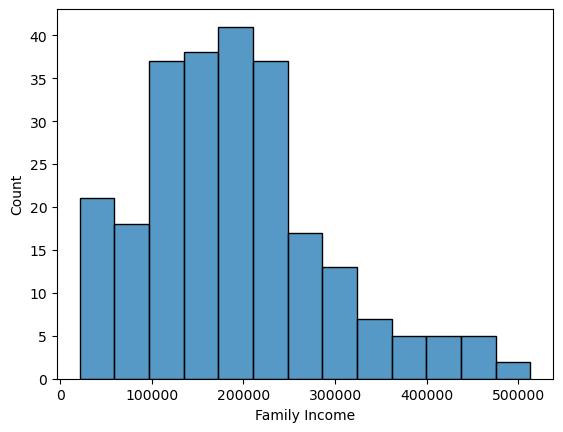

In [26]:
sns.histplot(x=df["Family Income"])

In [27]:
# Changing Scale of Family Income by Standard Scaling
df_scaled = df
df_scaled["Family Income"] = (df_scaled["Family Income"]-df_scaled["Family Income"].mean())/df_scaled["Family Income"].std()

<AxesSubplot:xlabel='Family Income', ylabel='Count'>

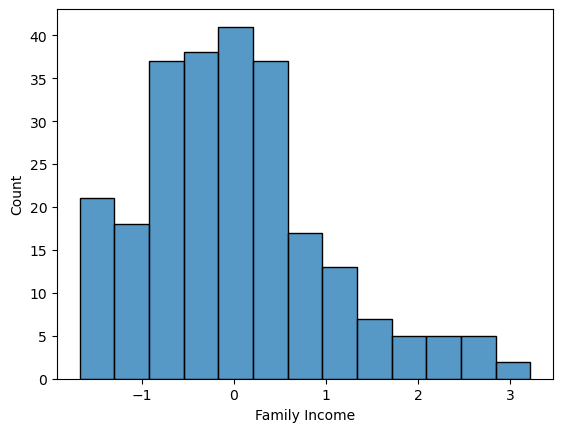

In [28]:
sns.histplot(df_scaled["Family Income"])

<AxesSubplot:xlabel='Height', ylabel='Family Income'>

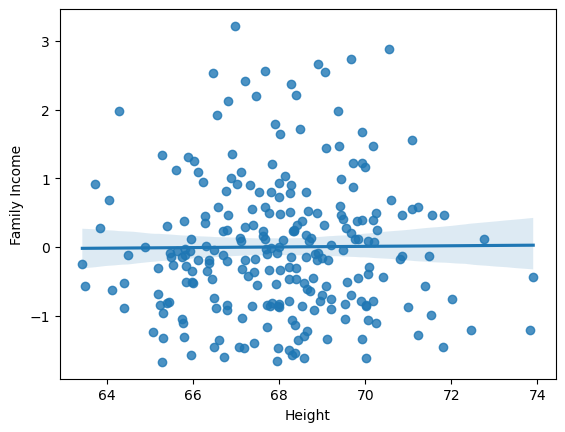

In [29]:
# Relation between 'Height' and 'Weight'
sns.regplot(data=df, x="Height", y="Family Income")

In [30]:
# Converting to more closer linear relation
heights = (df["Height"])
income = np.log(df["Family Income"])

C:\Users\Akash Kalme\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Height', ylabel='Family Income'>

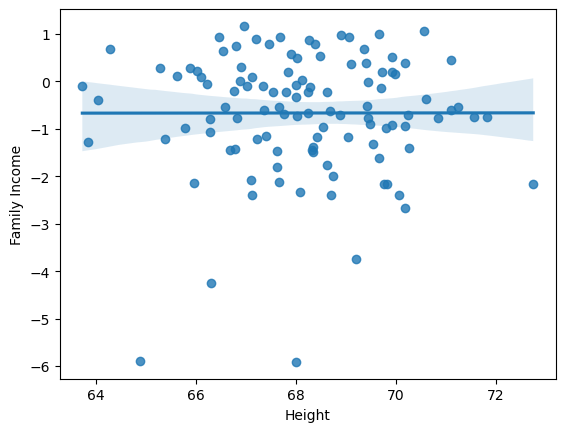

In [31]:
sns.regplot(x=heights, y=income)

In [32]:
# Reducing Skewness
df_skewed = df
df.skew(numeric_only=True)

Roll No.         0.009863
Height           0.147851
Weight          -0.032607
Family Income    0.743153
Math Score       7.039047
Science Score   -1.262631
English Score    1.081767
dtype: float64

We can see that 'Math Score' is highly positively skewed.

<AxesSubplot:xlabel='Math Score'>

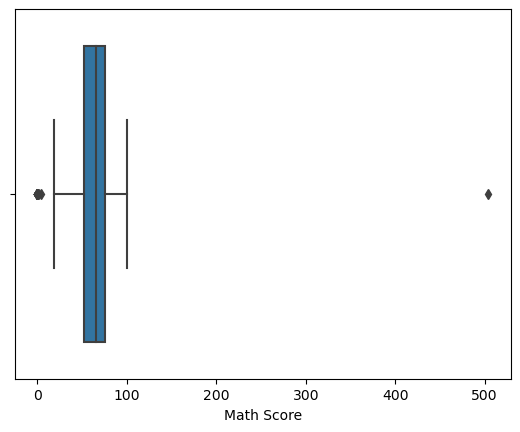

In [33]:
sns.boxplot(x=df["Math Score"])

In [34]:
# Removing the outlier to extreme right
df = df.loc[df["Math Score"]<=100]

<AxesSubplot:xlabel='Math Score', ylabel='Count'>

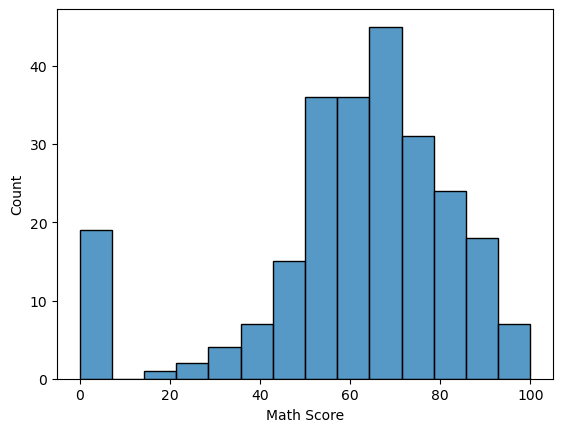

In [35]:
sns.histplot(df["Math Score"])

In [36]:
df["Math Score"].skew()

-1.2071799137449835

In [37]:
# Reducing skewness by Log Transform
df["Math Score Root"] = np.sqrt(df["Math Score"])

C:\Users\Akash Kalme\AppData\Local\Temp\ipykernel_20984\2435177333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Math Score Root"] = np.sqrt(df["Math Score"])


In [38]:
df["Math Score Root"].skew()

-2.331859249023662

<AxesSubplot:xlabel='Math Score Root', ylabel='Count'>

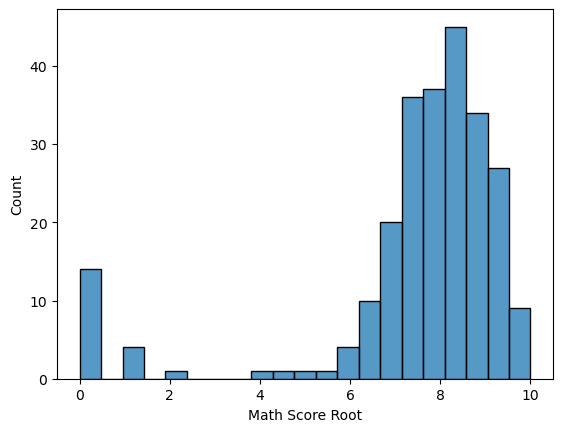

In [40]:
sns.histplot(df["Math Score Root"])

Skewness increased